In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os, sys
import seaborn as sns

In [6]:
# Get the current working directory
current_dir = os.getcwd()
# Move up one level from the current directory
parent_dir = os.path.dirname(current_dir)
# Change directory into data directory
data_dir = os.path.join(parent_dir, 'data')

In [7]:
sys.path.append(parent_dir)

# 1. Get the Data

In [10]:
df = pd.read_csv(os.path.join(data_dir, 'political_social_media.csv'), index_col=None, encoding='latin1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,...,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...",3.83249E+17,From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,...,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...",3.11208E+17,From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,...,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...",3.39069E+17,From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,...,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...",2.98528E+17,From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,...,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...",4.07643E+17,From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             5000 non-null   int64  
 1   _golden              5000 non-null   bool   
 2   _unit_state          5000 non-null   object 
 3   _trusted_judgments   5000 non-null   int64  
 4   _last_judgment_at    5000 non-null   object 
 5   audience             5000 non-null   object 
 6   audience:confidence  5000 non-null   float64
 7   bias                 5000 non-null   object 
 8   bias:confidence      5000 non-null   float64
 9   message              5000 non-null   object 
 10  message:confidence   5000 non-null   float64
 11  orig__golden         0 non-null      float64
 12  audience_gold        0 non-null      float64
 13  bias_gold            0 non-null      float64
 14  bioid                5000 non-null   object 
 15  embed                5000 non-null   o

# 2. Data Cleaning

In [12]:
columns_to_drop = ['_golden', '_unit_state', 'orig__golden', 'audience_gold', 'bias_gold', 'bioid', 'embed', 'id', 'message_gold']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,_unit_id,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,message:confidence,label,source,text
0,766192484,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,1.0,From: Trey Radel (Representative from Florida),twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,1.0,From: Mitch McConnell (Senator from Kentucky),twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,1,8/4/15 21:14,national,1.0,neutral,1.0,support,1.0,From: Kurt Schrader (Representative from Oregon),twitter,Please join me today in remembering our fallen...
3,766192487,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,1.0,From: Michael Crapo (Senator from Idaho),twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,1.0,From: Mark Udall (Senator from Colorado),twitter,.@amazon delivery #drones show need to update ...


# 3. Feature Engineering

In [16]:
# Extract name, occupation, and state from the label column
df[['name', 'occupation', 'state']] = df['label'].str.extract(r'From: (.+) \((.+) from (.+)\)')
# Drop the label column
df.drop(columns=['label'], inplace=True)
df.head()

,_unit_id,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message:confidence,source,text,message,name,occupation,state
0,766192484,1,8/4/15 21:17,national,1.0,partisan,1.0,1.0,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,policy,Trey Radel,Representative,Florida
1,766192485,1,8/4/15 21:20,national,1.0,partisan,1.0,1.0,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,attack,Mitch McConnell,Senator,Kentucky
2,766192486,1,8/4/15 21:14,national,1.0,neutral,1.0,1.0,twitter,Please join me today in remembering our fallen...,support,Kurt Schrader,Representative,Oregon
3,766192487,1,8/4/15 21:08,national,1.0,neutral,1.0,1.0,twitter,RT @SenatorLeahy: 1st step toward Senate debat...,policy,Michael Crapo,Senator,Idaho
4,766192488,1,8/4/15 21:26,national,1.0,partisan,1.0,1.0,twitter,.@amazon delivery #drones show need to update ...,policy,Mark Udall,Senator,Colorado


In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import string

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hamin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
# Define feature engineering functions
def word_count(text):
    return len(text.split())

def char_count(text):
    return len(text)

def avg_word_length(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words) if words else 0

def hashtag_count(text):
    return text.count('#')

def mention_count(text):
    return text.count('@')

def punctuation_count(text):
    return sum(1 for char in text if char in punctuation_set)

def stopword_count(text):
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

def sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return scores['pos'], scores['neg'], scores['neu'], scores['compound']

# Apply functions to create new columns
df['word_count'] = df['text'].apply(word_count)
df['char_count'] = df['text'].apply(char_count)
df['avg_word_length'] = df['text'].apply(avg_word_length)
df['hashtag_count'] = df['text'].apply(hashtag_count)
df['mention_count'] = df['text'].apply(mention_count)
df['punctuation_count'] = df['text'].apply(punctuation_count)
df['stopword_count'] = df['text'].apply(stopword_count)

# Extract sentiment scores
df[['positive', 'negative', 'neutral', 'compound']] = df['text'].apply(
    lambda x: pd.Series(sentiment_scores(x))
)

# Display the resulting DataFrame
print(df.head())


    _unit_id  _trusted_judgments _last_judgment_at  audience  \
0  766192484                   1      8/4/15 21:17  national   
1  766192485                   1      8/4/15 21:20  national   
2  766192486                   1      8/4/15 21:14  national   
3  766192487                   1      8/4/15 21:08  national   
4  766192488                   1      8/4/15 21:26  national   

   audience:confidence      bias  bias:confidence  message:confidence  \
0                  1.0  partisan              1.0                 1.0   
1                  1.0  partisan              1.0                 1.0   
2                  1.0   neutral              1.0                 1.0   
3                  1.0   neutral              1.0                 1.0   
4                  1.0  partisan              1.0                 1.0   

    source                                               text  ... char_count  \
0  twitter  RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...  ...         93   
1  twitter  VI

In [21]:
# Reorder columns, placing 'message' at the end
columns = [col for col in df.columns if col != 'message'] + ['message']
df = df[columns]
df.head()

,_unit_id,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message:confidence,source,text,...,avg_word_length,hashtag_count,mention_count,punctuation_count,stopword_count,positive,negative,neutral,compound,message
0,766192484,1,8/4/15 21:17,national,1.0,partisan,1.0,1.0,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,...,7.545455,3,1,15,0,0.000,0.000,1.000,0.0000,policy
1,766192485,1,8/4/15 21:20,national,1.0,partisan,1.0,1.0,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,...,6.727273,1,0,9,2,0.190,0.226,0.584,-0.1280,attack
2,766192486,1,8/4/15 21:14,national,1.0,neutral,1.0,1.0,twitter,Please join me today in remembering our fallen...,...,5.227273,0,0,1,9,0.363,0.082,0.556,0.8225,support
3,766192487,1,8/4/15 21:08,national,1.0,neutral,1.0,1.0,twitter,RT @SenatorLeahy: 1st step toward Senate debat...,...,5.250000,1,1,5,4,0.000,0.000,1.000,0.0000,policy
4,766192488,1,8/4/15 21:26,national,1.0,partisan,1.0,1.0,twitter,.@amazon delivery #drones show need to update ...,...,6.200000,4,1,15,4,0.224,0.000,0.776,0.6369,policy


In [25]:
df.columns

Index(['_unit_id', '_trusted_judgments', '_last_judgment_at', 'audience',
       'audience:confidence', 'bias', 'bias:confidence', 'message:confidence',
       'source', 'name', 'occupation', 'state', 'word_count', 'char_count',
       'avg_word_length', 'hashtag_count', 'mention_count',
       'punctuation_count', 'stopword_count', 'positive', 'negative',
       'neutral', 'compound', 'message'],
      dtype='object')

In [26]:
df.drop(columns=['_unit_id','text', '_last_judgment_at'], inplace=True)
df.head()

,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message:confidence,source,name,occupation,state,...,avg_word_length,hashtag_count,mention_count,punctuation_count,stopword_count,positive,negative,neutral,compound,message
0,1,national,1.0,partisan,1.0,1.0,twitter,Trey Radel,Representative,Florida,...,7.545455,3,1,15,0,0.000,0.000,1.000,0.0000,policy
1,1,national,1.0,partisan,1.0,1.0,twitter,Mitch McConnell,Senator,Kentucky,...,6.727273,1,0,9,2,0.190,0.226,0.584,-0.1280,attack
2,1,national,1.0,neutral,1.0,1.0,twitter,Kurt Schrader,Representative,Oregon,...,5.227273,0,0,1,9,0.363,0.082,0.556,0.8225,support
3,1,national,1.0,neutral,1.0,1.0,twitter,Michael Crapo,Senator,Idaho,...,5.250000,1,1,5,4,0.000,0.000,1.000,0.0000,policy
4,1,national,1.0,partisan,1.0,1.0,twitter,Mark Udall,Senator,Colorado,...,6.200000,4,1,15,4,0.224,0.000,0.776,0.6369,policy


# 4. EDA

In [27]:
df.columns

Index(['_trusted_judgments', 'audience', 'audience:confidence', 'bias',
       'bias:confidence', 'message:confidence', 'source', 'name', 'occupation',
       'state', 'word_count', 'char_count', 'avg_word_length', 'hashtag_count',
       'mention_count', 'punctuation_count', 'stopword_count', 'positive',
       'negative', 'neutral', 'compound', 'message'],
      dtype='object')

In [29]:
df.apply(lambda col: col.unique())

_trusted_judgments                                             [1, 2, 3]
audience                                        [national, constituency]
audience:confidence    [1.0, 0.5426, 0.5085, 0.5461, 0.5455, 0.5556, ...
bias                                                 [partisan, neutral]
bias:confidence        [1.0, 0.5216, 0.5085, 0.5556, 0.5294, 0.5461, ...
message:confidence     [1.0, 0.5085, 0.5426, 0.6849, 0.5308, 0.5461, ...
source                                               [twitter, facebook]
name                   [Trey Radel, Mitch McConnell, Kurt Schrader, M...
occupation                                     [Representative, Senator]
state                  [Florida, Kentucky, Oregon, Idaho, Colorado, N...
word_count             [11, 22, 20, 18, 15, 21, 19, 17, 16, 9, 13, 14...
char_count             [93, 85, 136, 124, 143, 123, 134, 139, 145, 14...
avg_word_length        [7.545454545454546, 6.7272727272727275, 5.2272...
hashtag_count                                   [3,

In [28]:
# Select categorical attributes
cat_attribs = df.select_dtypes(include=['object']).columns.tolist()

# Select numerical attributes
num_attribs = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical attributes:", cat_attribs)
print("Numerical attributes:", num_attribs)

Categorical attributes: ['audience', 'bias', 'source', 'name', 'occupation', 'state', 'message']
Numerical attributes: ['_trusted_judgments', 'audience:confidence', 'bias:confidence', 'message:confidence', 'word_count', 'char_count', 'avg_word_length', 'hashtag_count', 'mention_count', 'punctuation_count', 'stopword_count', 'positive', 'negative', 'neutral', 'compound']


## 4.1 Univariate

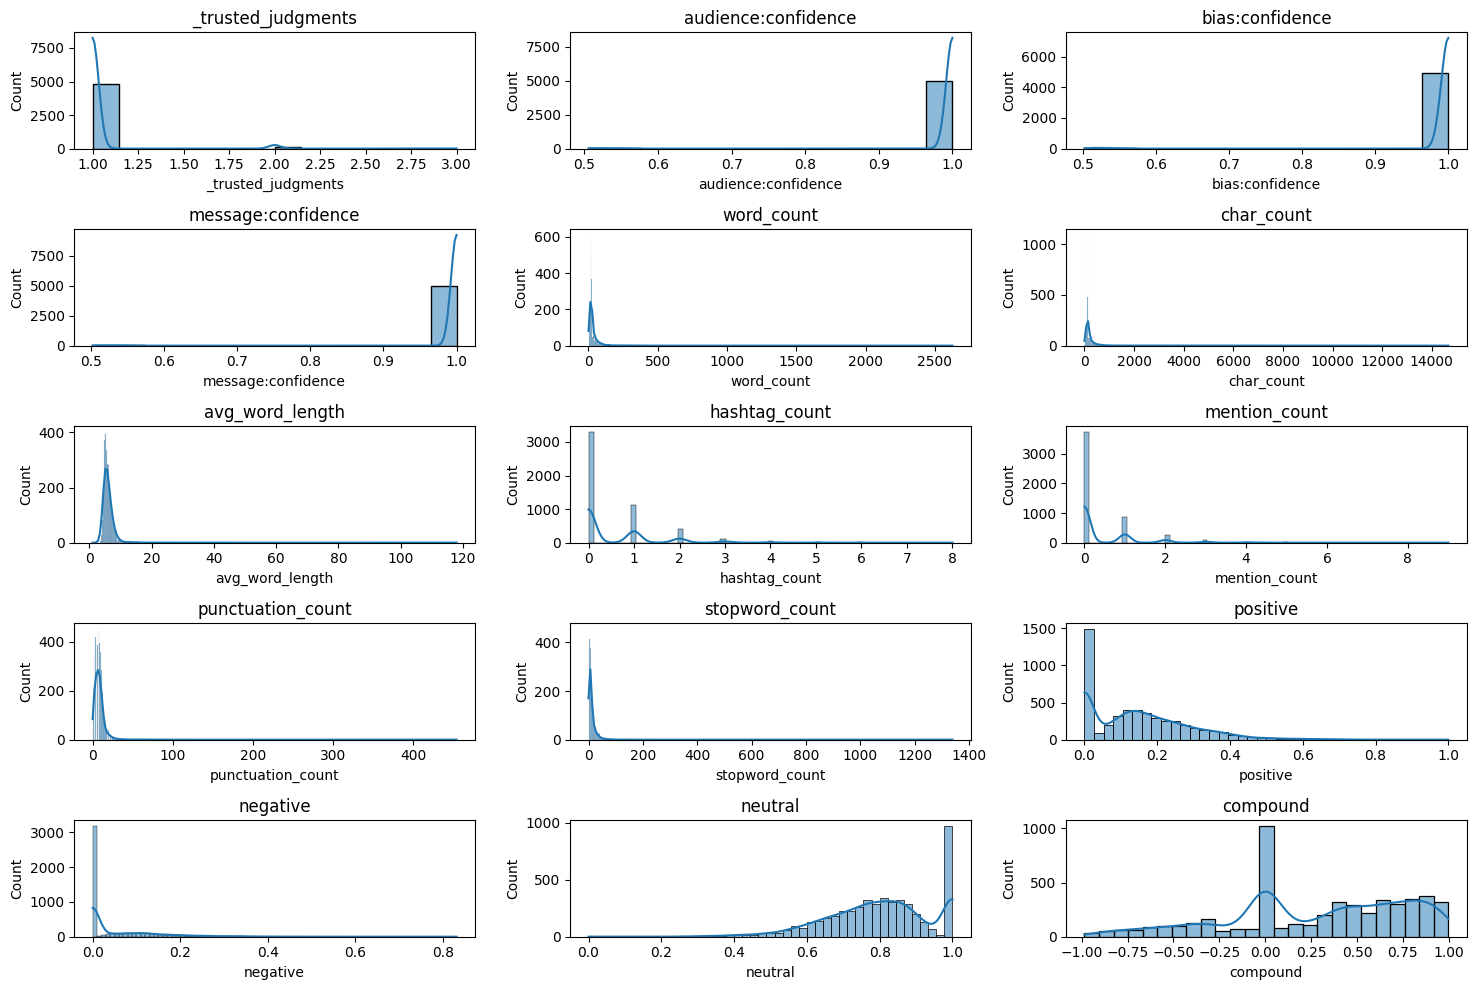

In [32]:
# Define the number of rows and columns for subplots
num_rows = 5
num_cols = (len(num_attribs) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over numerical attributes
axes = axes.flatten()

# Iterate over numerical attributes and plot histograms
for i, column in enumerate(num_attribs):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\hamin\AppData\Local\Temp\ipykernel_39636\3607140963.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=axes[i], palette='viridis')
C:\Users\hamin\AppData\Local\Temp\ipykernel_39636\3607140963.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=axes[i], palette='viridis')
C:\Users\hamin\AppData\Local\Temp\ipykernel_39636\3607140963.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], ax=axes[i], palette='viridis')
C:\Users\hamin\AppData\Local\Temp\ipykernel_39636\3607140963.py:

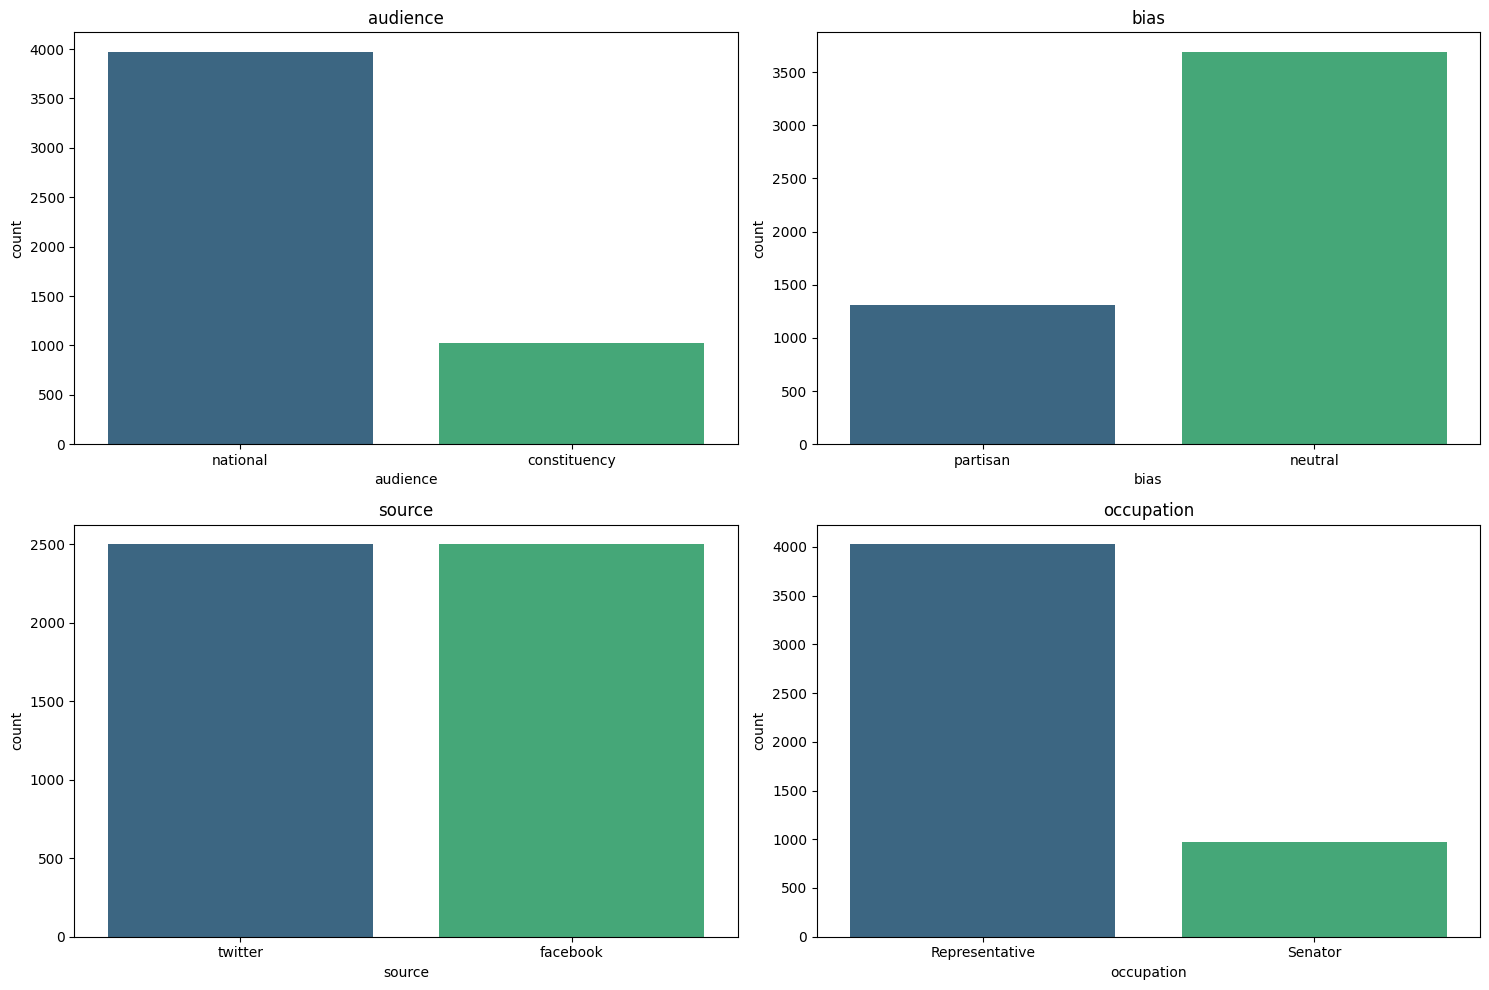

In [39]:
# Define the number of rows and columns for subplots
num_rows = 2
cat_attribs_filtered = [col for col in cat_attribs if col not in ['state', 'name', 'message']]
num_cols = (len(cat_attribs_filtered) + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to iterate over categorical attributes
axes = axes.flatten()

# Iterate over categorical attributes and plot bar graphs
for i, column in enumerate(cat_attribs_filtered):
    sns.countplot(x=df[column], ax=axes[i], palette='viridis')
    axes[i].set_title(column)

# Hide empty subplots
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## 4.2 Multivariate

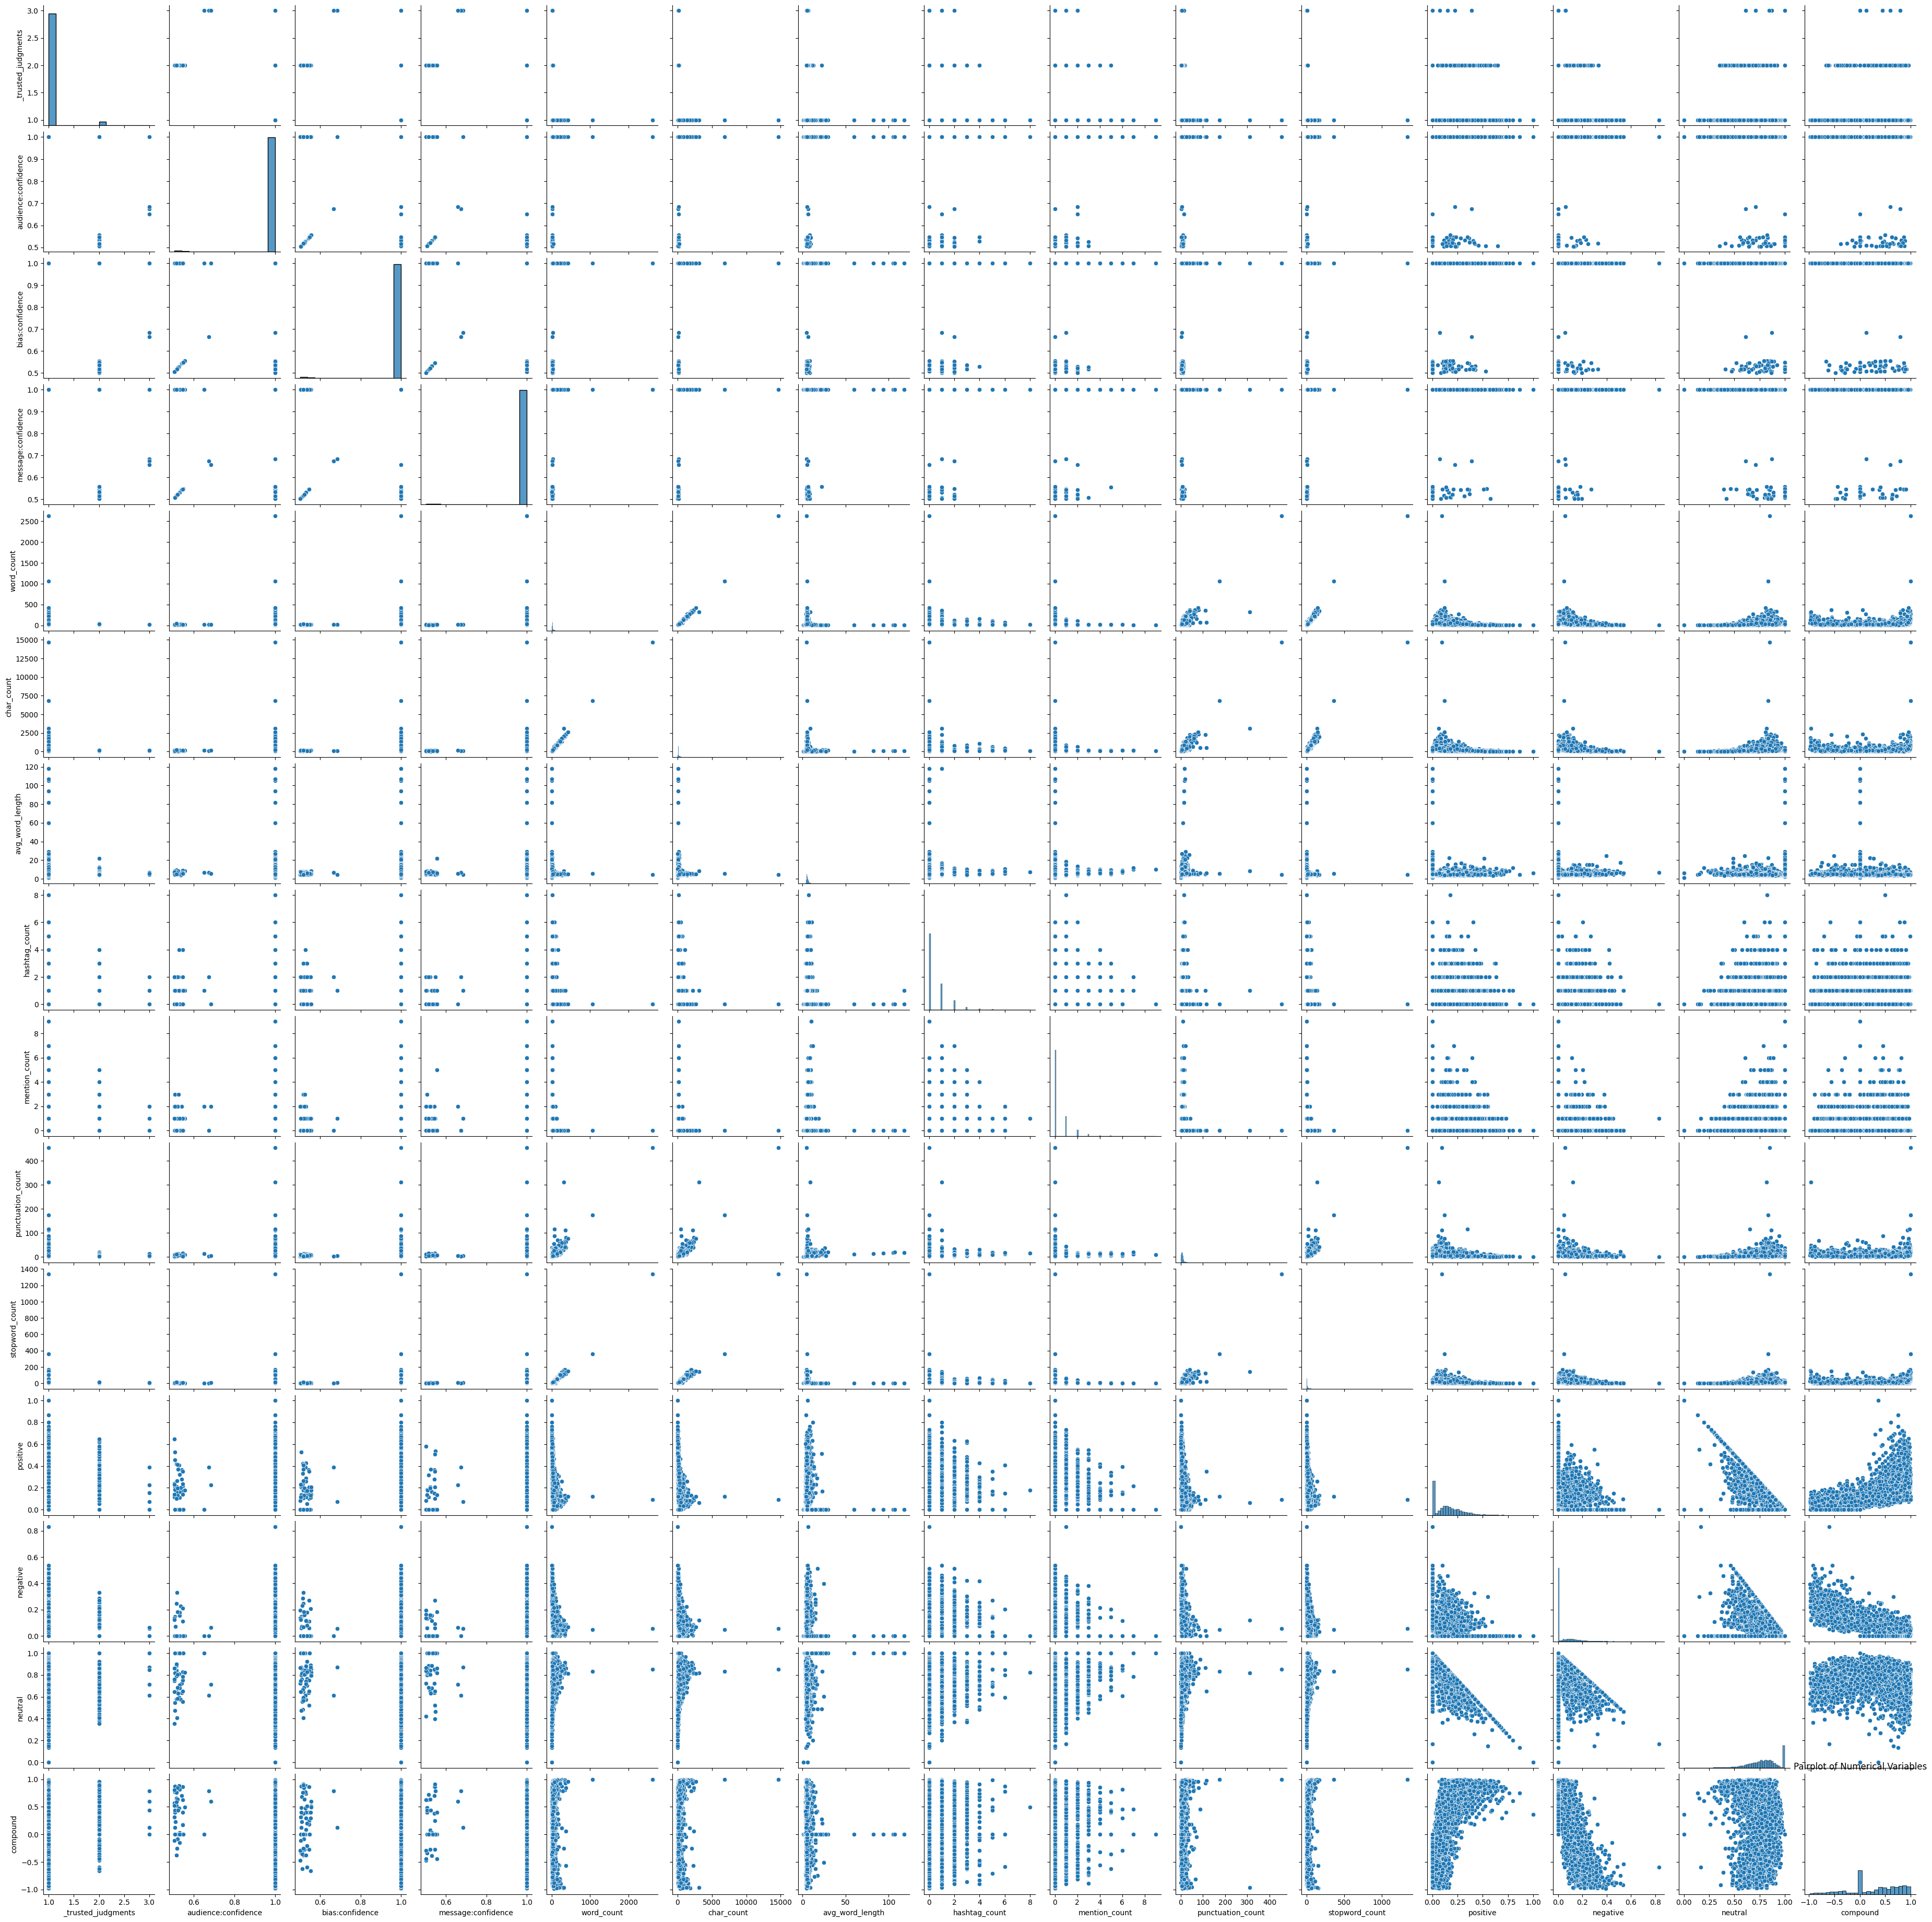

In [40]:
sns.pairplot(df[num_attribs])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [41]:
def plot_distribution_curves(df, columns, hue_column):
    """
    Plot distribution curves for each column in the DataFrame
    with respect to the specified hue column using different colors.

    Parameters:
        df (pandas.DataFrame): DataFrame containing the data.
        columns (list): List of columns to plot.
        hue_column (str): Column to use for coloring the distribution curves.

    Returns:
        None
    """
    colors = sns.color_palette("husl", len(df[hue_column].unique()))
    
    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for i, col in enumerate(columns):
        for j, value in enumerate(df[hue_column].unique()):
            sns.kdeplot(data=df[df[hue_column] == value], x=col, color=colors[j], ax=axes[i])
        axes[i].set_title(f"Distribution of {col} by {hue_column}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        if i == 0:  # Plot the legend only once
            axes[i].legend(df[hue_column].unique(), title=hue_column)

    plt.tight_layout()
    plt.show()

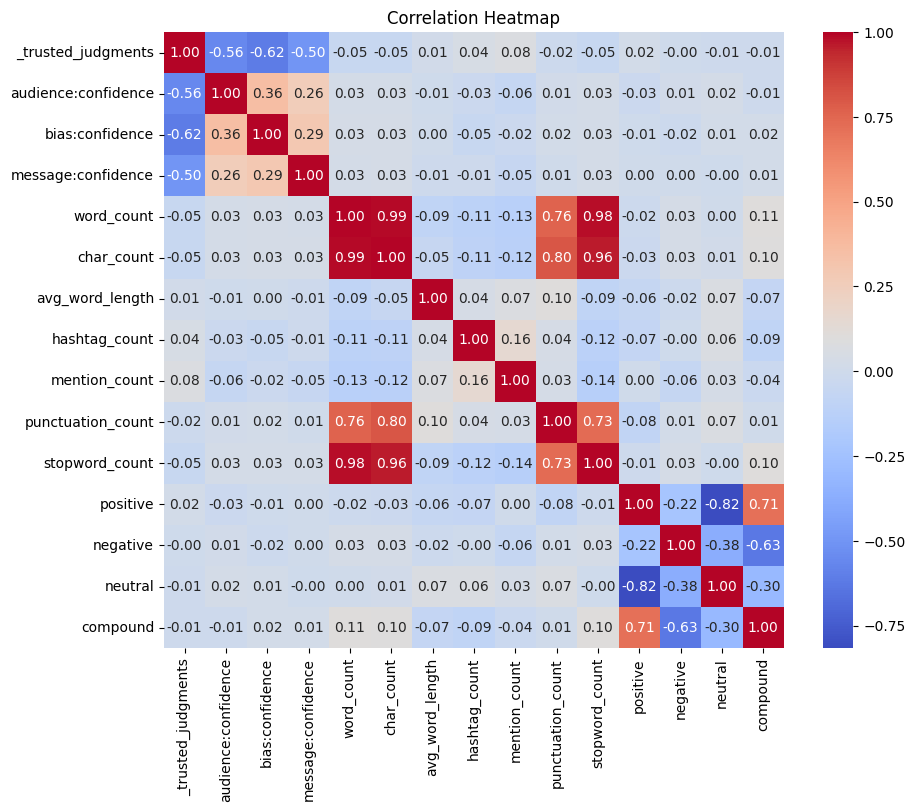

In [44]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_attribs].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 5. Split Training-Testing

In [45]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [47]:
train_set.head()

,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message:confidence,source,name,occupation,state,...,avg_word_length,hashtag_count,mention_count,punctuation_count,stopword_count,positive,negative,neutral,compound,message
1840,1,national,1.0,neutral,1.0,1.0,twitter,Ralph Hall,Representative,Texas,...,7.454545,0,0,8,2,0.000,0.213,0.787,-0.4019,support
2115,1,national,1.0,neutral,1.0,1.0,twitter,Deb Fischer,Senator,Nebraska,...,5.150000,0,0,5,7,0.382,0.000,0.618,0.8720,policy
4437,1,national,1.0,neutral,1.0,1.0,facebook,Scott Rigell,Representative,Virginia,...,4.901316,0,0,22,59,0.175,0.114,0.712,0.8519,other
1146,1,constituency,1.0,partisan,1.0,1.0,twitter,Ron Wyden,Senator,Oregon,...,5.136364,1,2,12,9,0.121,0.101,0.778,0.1280,policy
2486,1,national,1.0,partisan,1.0,1.0,twitter,David Schweikert,Representative,Arizona,...,5.428571,1,2,6,8,0.000,0.255,0.745,-0.7579,policy


In [50]:
cat_attribs.remove("message")

In [51]:
train = train_set.drop(['message'], axis=1)
train_labels = train_set[["message"]]

test = test_set.drop("message", axis=1)
test_labels = test_set[["message"]]

train_num = train[num_attribs]
train_cat = train[cat_attribs]

# 6.Preprocess Data

## 6.1 Handle Categorical Data

In [52]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [53]:
train_cat

,audience,bias,source,name,occupation,state
1840,national,neutral,twitter,Ralph Hall,Representative,Texas
2115,national,neutral,twitter,Deb Fischer,Senator,Nebraska
4437,national,neutral,facebook,Scott Rigell,Representative,Virginia
1146,constituency,partisan,twitter,Ron Wyden,Senator,Oregon
2486,national,partisan,twitter,David Schweikert,Representative,Arizona
...,...,...,...,...,...,...
4426,national,neutral,facebook,Reid Ribble,Representative,Wisconsin
466,national,partisan,twitter,Rosa DeLauro,Representative,Connecticut
3092,national,partisan,facebook,Suzan DelBene,Representative,Washington
3772,national,partisan,facebook,Zoe Lofgren,Representative,California


In [54]:
ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat[cat_attribs])
train_cat_encoded[:10]

array([[  1.,   0.,   1., 359.,   0.,  43.],
       [  1.,   0.,   1., 103.,   1.,  27.],
       [  1.,   0.,   0., 412.,   0.,  46.],
       [  0.,   1.,   1., 398.,   1.,  37.],
       [  1.,   1.,   1.,  98.,   0.,   2.],
       [  1.,   1.,   1., 292.,   0.,  49.],
       [  1.,   0.,   1., 326.,   0.,   0.],
       [  1.,   0.,   1.,  70.,   0.,  32.],
       [  0.,   0.,   0., 150.,   0.,  37.],
       [  1.,   0.,   1.,  19.,   0.,  24.]])

## 6.2 Handle Numerical Values (Feature Scaling)

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [56]:
def minmax_scale_dataframe(df, columns_to_scale=None):
    """
    Scale the specified columns in the DataFrame using Min-Max scaling.
    
    Parameters:
        df (pandas.DataFrame): DataFrame to be scaled.
        columns_to_scale (list): List of columns to be scaled. If None, scale all numerical columns.
        
    Returns:
        pandas.DataFrame: Scaled DataFrame.
    """
    scaler = MinMaxScaler()
    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include=['number']).columns.tolist()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
    return df_scaled

In [57]:
def standard_scale_dataframe(df, columns_to_scale=None):
    """
    Scale the specified columns in the DataFrame using standard scaling.
    
    Parameters:
        df (pandas.DataFrame): DataFrame to be scaled.
        columns_to_scale (list): List of columns to be scaled. If None, scale all numerical columns.
        
    Returns:
        pandas.DataFrame: Scaled DataFrame.
    """
    scaler = StandardScaler()
    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include=['number']).columns.tolist()
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
    return df_scaled

## 6.3 Transformation Pipelines

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [59]:
train_set.head()

,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message:confidence,source,name,occupation,state,...,avg_word_length,hashtag_count,mention_count,punctuation_count,stopword_count,positive,negative,neutral,compound,message
1840,1,national,1.0,neutral,1.0,1.0,twitter,Ralph Hall,Representative,Texas,...,7.454545,0,0,8,2,0.000,0.213,0.787,-0.4019,support
2115,1,national,1.0,neutral,1.0,1.0,twitter,Deb Fischer,Senator,Nebraska,...,5.150000,0,0,5,7,0.382,0.000,0.618,0.8720,policy
4437,1,national,1.0,neutral,1.0,1.0,facebook,Scott Rigell,Representative,Virginia,...,4.901316,0,0,22,59,0.175,0.114,0.712,0.8519,other
1146,1,constituency,1.0,partisan,1.0,1.0,twitter,Ron Wyden,Senator,Oregon,...,5.136364,1,2,12,9,0.121,0.101,0.778,0.1280,policy
2486,1,national,1.0,partisan,1.0,1.0,twitter,David Schweikert,Representative,Arizona,...,5.428571,1,2,6,8,0.000,0.255,0.745,-0.7579,policy


In [63]:
num_pipeline = Pipeline([
 ('std_scaler', StandardScaler())
 ])

full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
 ])

train_prepared = full_pipeline.fit_transform(train)

In [64]:
train_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 73500 stored elements and shape (3500, 562)>

# 7. Modelling

## 7.1 Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
	'max_depth': [10, 15, 20],
	'min_samples_split': [10, 20, 30],
	'min_samples_leaf': [5, 10, 15]
}

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(train_prepared, train_labels)

# Get the best estimator
best_tree_clf = grid_search.best_estimator_

# Fit the best estimator on the training data
best_tree_clf.fit(train_prepared, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, min_samples_split=10)

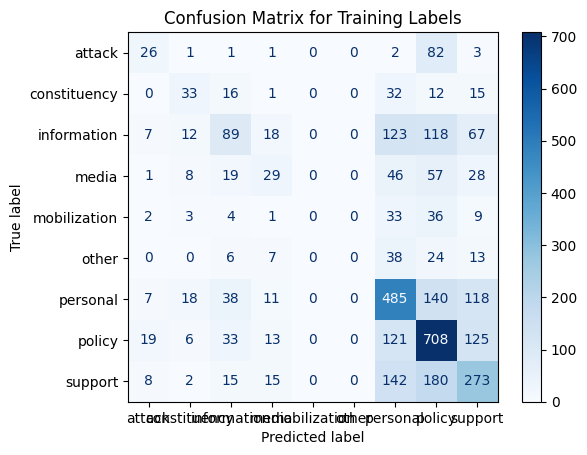

Accuracy: 0.47
F1 Score: 0.44


In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# Predict the labels for the training set
train_predictions = best_tree_clf.predict(train_prepared)

# Compute the confusion matrix
cm = confusion_matrix(train_labels, train_predictions, labels=best_tree_clf.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Labels')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(train_labels, train_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 score
f1 = f1_score(train_labels, train_predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')

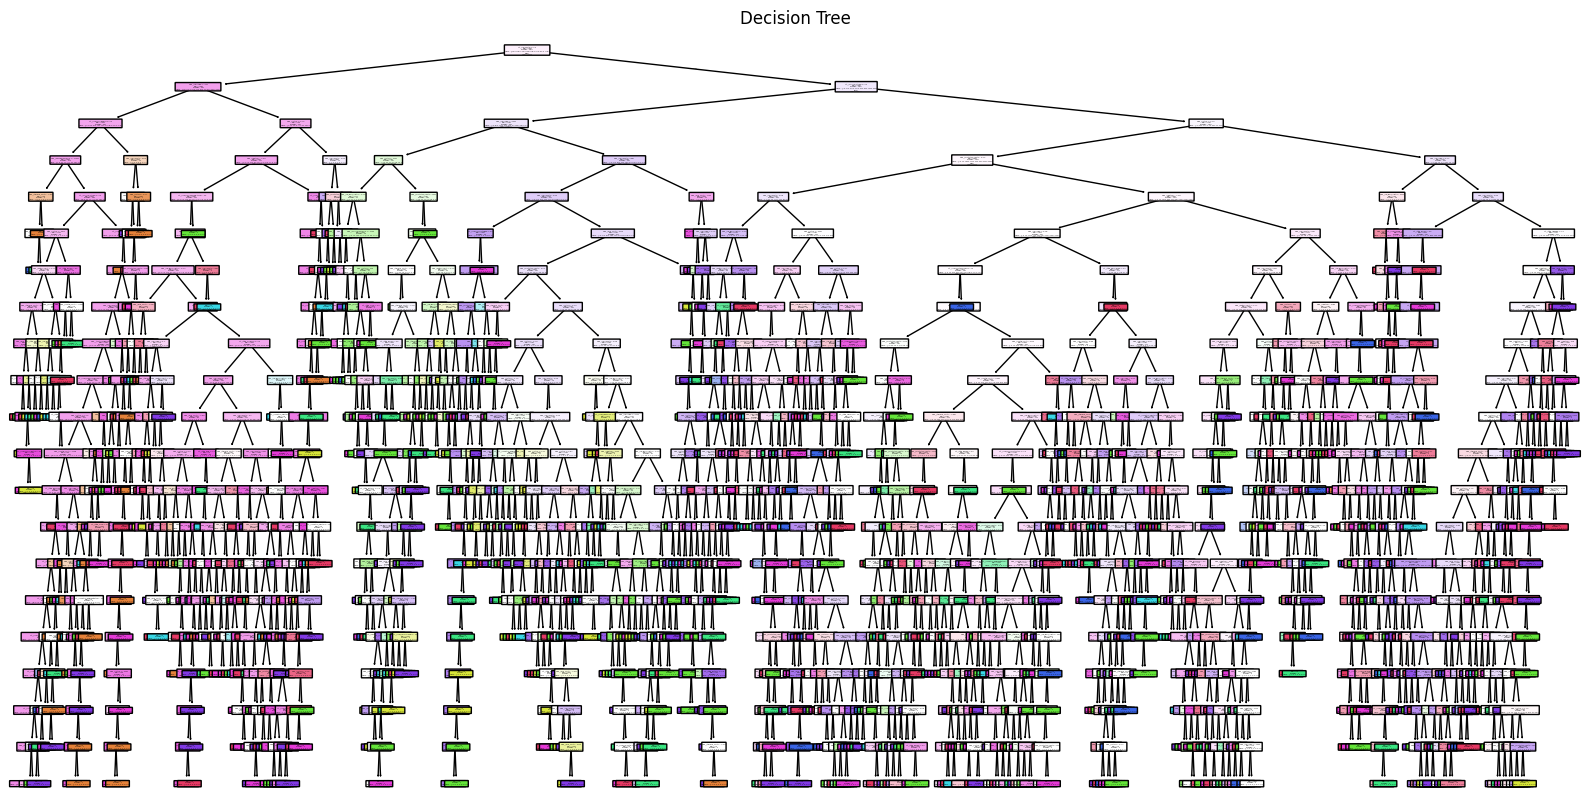

In [83]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=full_pipeline.get_feature_names_out(), class_names=tree_clf.classes_, rounded=True)
plt.title('Decision Tree')
plt.show()

## 7.2 Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_rf.fit(train_prepared, train_labels.values.ravel())

# Get the best estimator
best_rf_clf = grid_search_rf.best_estimator_

# Fit the best estimator on the training data
best_rf_clf.fit(train_prepared, train_labels.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_split=20, n_estimators=300,
                       random_state=42)

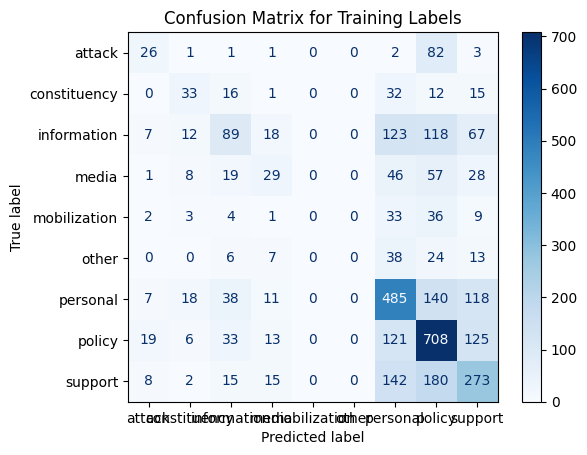

Accuracy: 0.47
F1 Score: 0.44


In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# Predict the labels for the training set
train_predictions = best_tree_clf.predict(train_prepared)

# Compute the confusion matrix
cm = confusion_matrix(train_labels, train_predictions, labels=best_tree_clf.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Labels')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(train_labels, train_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 score
f1 = f1_score(train_labels, train_predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')

# 7.3 SVC

In [96]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels.values.ravel())
# Define the parameter grid for hyperparameter tuning
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVM Classifier
svc_clf = SVC()

# Initialize GridSearchCV with cross-validation
grid_search_svc = GridSearchCV(svc_clf, param_grid_svc, cv=5, scoring='accuracy')

# Fit the model
grid_search_svc.fit(train_prepared, train_labels_encoded)

# Get the best estimator
best_svc_clf = grid_search_svc.best_estimator_

# Fit the best estimator on the training data
best_svc_clf.fit(train_prepared, train_labels_encoded)

SVC(C=1, gamma=0.01)

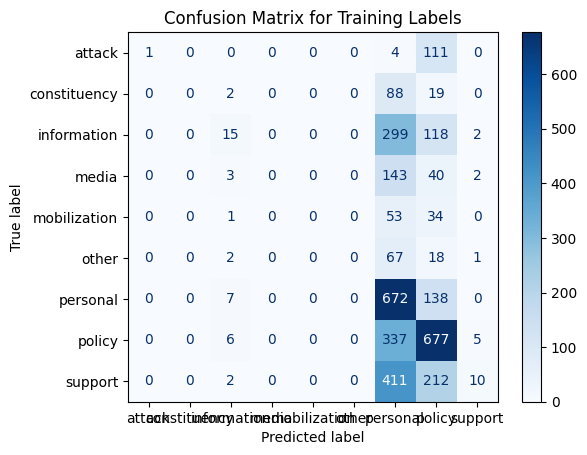

Accuracy: 0.39
F1 Score: 0.29


In [103]:
# Predict the labels for the training set
train_predictions = best_svc_clf.predict(train_prepared)

# Encode the training labels for consistency
train_labels_encoded = label_encoder.transform(train_labels.values.ravel())

# Compute the confusion matrix
cm = confusion_matrix(train_labels_encoded, train_predictions, labels=np.arange(len(label_encoder.classes_)))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Labels')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(train_labels_encoded, train_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 score
f1 = f1_score(train_labels_encoded, train_predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')

# 8. Final Predictions

## 8.1 Decision Tree

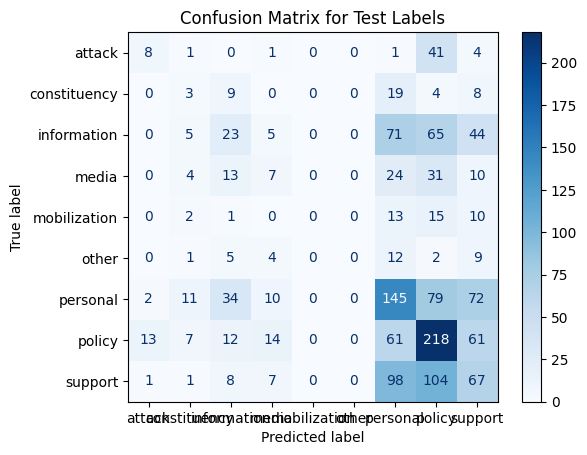

Accuracy: 0.31
F1 Score: 0.29
['personal' 'personal' 'policy' ... 'support' 'policy' 'policy']


In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# Prepare the test set
test_prepared = full_pipeline.transform(test)

# Predict the labels for the test set
test_predictions = best_tree_clf.predict(test_prepared)

# Compute the confusion matrix
cm_test = confusion_matrix(test_labels, test_predictions, labels=best_tree_clf.classes_)

# Display the confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_tree_clf.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Labels')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Display the predictions
print(test_predictions)

## 8.2

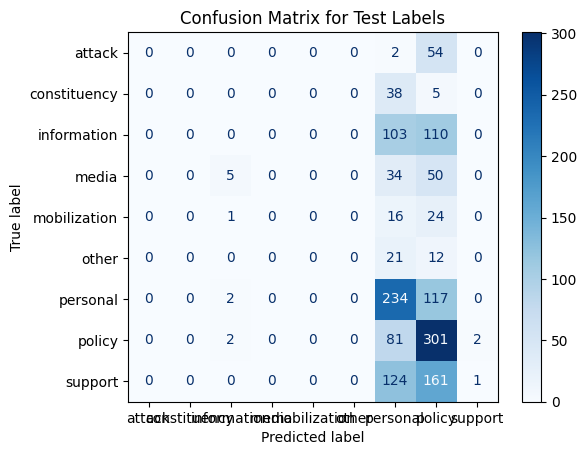

Accuracy: 0.36
F1 Score: 0.24
['personal' 'personal' 'policy' ... 'personal' 'policy' 'policy']


In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# Prepare the test set
test_prepared = full_pipeline.transform(test)

# Predict the labels for the test set using the Random Forest model
test_predictions = best_rf_clf.predict(test_prepared)

# Compute the confusion matrix
cm_test = confusion_matrix(test_labels, test_predictions, labels=best_rf_clf.classes_)

# Display the confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_rf_clf.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Labels')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 score
f1 = f1_score(test_labels, test_predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Display the predictions
print(test_predictions)

## 8.3 SVC

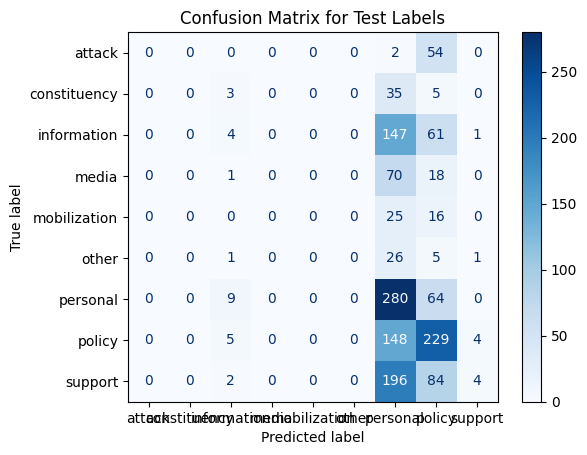

Accuracy: 0.34
F1 Score: 0.24
[6 6 7 ... 6 7 7]


In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# Prepare the test set
test_prepared = full_pipeline.transform(test)

# Predict the labels for the test set using the best SVC model
test_predictions = best_svc_clf.predict(test_prepared)

# Encode the test labels for consistency
test_labels_encoded = label_encoder.transform(test_labels.values.ravel())

# Compute the confusion matrix
cm_test = confusion_matrix(test_labels_encoded, test_predictions, labels=np.arange(len(label_encoder.classes_)))

# Display the confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Labels')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(test_labels_encoded, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 score
f1 = f1_score(test_labels_encoded, test_predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Display the predictions
print(test_predictions)